<a href="https://colab.research.google.com/github/RoiLe/AI-picture-recognition/blob/Roi-dev/demo_AI_img_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science final project - [proposal]
#### by Lior Guetta & Roi Levi

<h1>(1) Problem description</h1>



In today's digital age, the rise of artificial intelligence has brought us to a time when it's tricky to tell if a picture is real or made by a computer, AI-powered tools now have the capability to produce images that can be virtually indistinguishable from those captured by a camera. This project is dedicated to the critical task of discerning between genuine and AI-generated images.

The proliferation of AI-generated images presents a unique set of challenges. With the potential for images to be manipulated or fabricated, it becomes imperative to develop robust methods for distinguishing fact from fiction. This project aims to address this issue by exploring techniques that can reliably determine whether an image was created by an AI tool or is a product of the physical world.

Throughout this project, we will go deeply into various aspects of image analysis, datasets containing both authentic and AI-generated images, and advanced computational methods. By doing so, we aim to provide a valuable contribution to the ongoing discourse on the credibility of digital visuals.


> Indented block


As we embark on this journey to distinguish real from AI-generated images, we invite you to join us in unraveling the complexities of this modern-day challenge. Together, we aspire to contribute to a future where digital images can be scrutinized and trusted with confidence.



In a world where image generators are on the rise, there is a need to understand which images are real or which images were created by a machine. This situation is important to us for many scenarios, for example if we take it to the news, now we can easily create an image that will show a situation that never happened before, or for example we can steal copyrights by creating a similar image of a well-known artist, and that's just the tip of the iceberg.

For these reasons, we chose to produce a reliability measure for images.

######some examples of generated images

#### requirements

In [ ]:
%pip install opendatasets
%pip install pandas
%pip install seaborn

#### imports

In [ ]:
import opendatasets as od
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import shutil
import random
import numpy as np
from PIL import Image
import seaborn as sns


## Data Collection

#### kaggle DS
##### 120K of FAKE&REAL images

In [ ]:
od.download("https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle Key:Downloading cifake-real-and-ai-generated-synthetic-images.zip to .\cifake-real-and-ai-generated-synthetic-images


100%|██████████| 105M/105M [05:56<00:00, 307kB/s]  


<h1>(2) EDA</h1>

In our quest to distinguish authentic images from AI-generated ones, Exploratory Data Analysis (EDA) plays a pivotal role.

EDA is our compass through the sea of data, guiding us to uncover critical insights about image characteristics.

Our primary focus during this analysis will revolve around four key aspects: **the number of colors, sharpness, brightness, and contrast.**

Through this focused EDA, we aim to uncover unique insights into these specific image attributes, enabling us to make informed decisions regarding data preprocessing, feature selection, and model development.

Our journey through these aspects of image analysis will be instrumental in building a robust system for differentiating between real and AI-generated images.






In [ ]:
# path to the directories:
base_path = './cifake-real-and-ai-generated-synthetic-images'
TEST, TRAIN = 'test', 'train'
REAL, FAKE = 'REAL', 'FAKE'
test_fake = os.listdir('./cifake-real-and-ai-generated-synthetic-images/test/FAKE')
test_real = os.listdir('./cifake-real-and-ai-generated-synthetic-images/test/REAL')
train_fake = os.listdir('./cifake-real-and-ai-generated-synthetic-images/train/FAKE')
train_real = os.listdir('./cifake-real-and-ai-generated-synthetic-images/train/REAL')

In [ ]:
# some variables..
arr_fake = []
arr_real = []
arr_fake_num_colors = []
arr_real_num_colors = []
arr_fake_sharpness = []
arr_real_sharpness = []
arr_fake_brightness = []
arr_real_brightness = []
arr_fake_contrast = []
arr_real_contrast = []
max_colors = 10000
total_colors_fake = 0
total_colors_real = 0
total_sharpness_fake = 0
total_sharpness_real = 0
total_brightness_fake = 0
total_brightness_real = 0
total_contrast_fake = 0
total_contrast_real = 0

We will go through all the images from each ds and examine:
1) The number of colors in the picture.
2) the sharpness of the image.
3) The contrast of the colors in the picture.
4) The clarity of the image

A. Fake images loop:

In [ ]:
for picture in train_fake :
    # read & open image
    image = cv2.imread(os.path.join(base_path, TRAIN, FAKE, picture))
    img = Image.open(os.path.join(base_path, TRAIN, FAKE, picture))

    # convert to gray scale image.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 1. number of colors
    total_colors_fake = total_colors_fake +(len(img.getcolors(max_colors)))
    # 2. sharpeness
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    total_sharpness_fake = total_sharpness_fake + sharpness
    arr_fake_sharpness.append(sharpness)
    # 3. brightness
    brightness = int(gray.mean())
    # 4. contarst
    contrast = np.std(gray)
    total_contrast_fake = total_contrast_fake +contrast
    arr_fake_contrast.append(contrast)
    total_brightness_fake = total_brightness_fake+brightness
    arr_fake_brightness.append(brightness)
    arr_fake_num_colors.append(len(img.getcolors(max_colors)))
    arr_fake.append(image)

B. Real images loop:

In [ ]:
for picture in train_real :
    # read & open image
    image = cv2.imread(os.path.join(base_path, TRAIN, REAL, picture))
    img = Image.open(os.path.join(base_path, TRAIN, REAL, picture))

     # convert to gray scale image.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 1. number of colors
    total_colors_real = total_colors_real +(len(img.getcolors(max_colors)))
    # 2. sharpeness
    sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
    total_sharpness_real = total_sharpness_real + sharpness
    arr_real_sharpness.append(sharpness)
    # 3. brightness
    brightness = int(gray.mean())
    # 3. contarst
    contrast = np.std(gray)
    total_contrast_real = total_contrast_real + contrast
    arr_real_contrast.append(contrast)
    total_brightness_real = total_brightness_real+brightness
    arr_real_brightness.append(brightness)
    arr_real_num_colors.append(len(img.getcolors(max_colors)))
    arr_real.append(image)

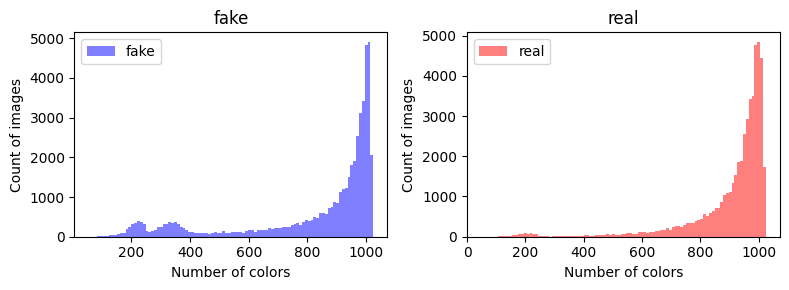

Average number of colors for fake images:  826.076
Average number of colors for real images:  907.034


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_num_colors, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('Number of colors')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_num_colors, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('Number of colors')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
print('Average number of colors for fake images: ',round((total_colors_fake/len(train_fake)),3))
print('Average number of colors for real images: ',round((total_colors_real/len(train_real)),3))

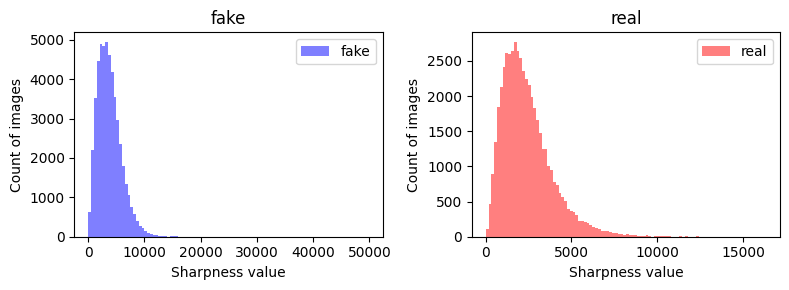

Average sharpness for fake images:  3772.899
Average sharpness for real images:  2432.842


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_sharpness, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('Sharpness value')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_sharpness, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('Sharpness value')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print('Average sharpness for fake images: ',round((total_sharpness_fake/len(train_fake)),3))
print('Average sharpness for real images: ',round((total_sharpness_real/len(train_real)),3))

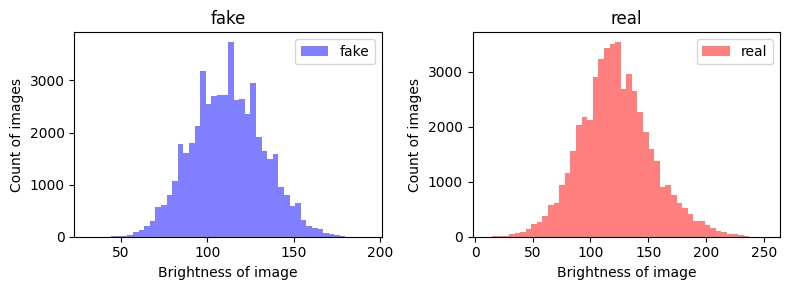

Average brightness for fake images:  111.762
Average brightness for real images:  122.098


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_brightness, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('Brightness of image')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_brightness, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('Brightness of image')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print('Average brightness for fake images: ',round((total_brightness_fake/len(train_fake)),3))
print('Average brightness for real images: ',round((total_brightness_real/len(train_real)),3))

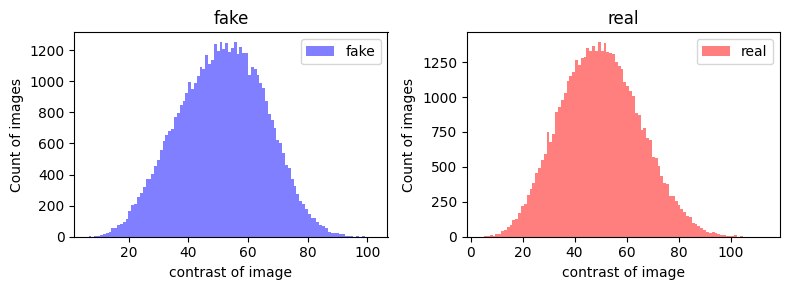

Average contrast for fake images:  51.224
Average contrast for real images:  49.995


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
# Plot histogram for dataset 1 in the first subplot
axes[0].hist(arr_fake_contrast, bins=100, alpha=0.5, color='blue', label='fake')
axes[0].set_xlabel('contrast of image')
axes[0].set_ylabel('Count of images')
axes[0].set_title('fake')
axes[0].legend()

# Plot histogram for dataset 2 in the second subplot
axes[1].hist(arr_real_contrast, bins=100, alpha=0.5, color='red', label='real')
axes[1].set_xlabel('contrast of image')
axes[1].set_ylabel('Count of images')
axes[1].set_title('real')
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print('Average contrast for fake images: ',round((total_contrast_fake/len(train_fake)),3))
print('Average contrast for real images: ',round((total_contrast_real/len(train_real)),3))

<h1>(3) Basic Algoritms</h1>

<h2>HOGS</h2>

Histogram of Oriented Gradients (HOG) is a potent image analysis technique that excels at capturing texture and shape details by analyzing local gradients within images. This method provides valuable insights into these structural features, aiding in the differentiation between authentic and AI-generated images. HOG's resilience to lighting and color variations makes it a key tool in enhancing image authenticity verification systems.

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray


In [ ]:

# Function to load and process image data from a directory
def load_images_from_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming your images are JPEG files
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img = np.array(img)  # Convert the image to a NumPy array
            data.append(img)
    return np.array(data)


In [ ]:


# Function to compute HOG features for a list of images
def compute_hog_features(images):
    flag = 1
    hog_features = []
    for img in images:
        gray_img = rgb2gray(img)
        # Compute HOG features
        fd, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
        if(flag == 1):
            # Plot gradient histogram
            plt.figure(figsize=(8, 8))
            plt.subplot(121)
            plt.imshow(gray_img, cmap=plt.cm.gray)
            plt.title('Input Image')

            # Rescale histogram for better visualization
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

            # Plot HOG features
            plt.subplot(122)
            plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
            plt.title('HOG Features')
            plt.show()
            flag = 0
    return hog_features



In [ ]:
# Directory paths
train_fake_dir = "cifake-real-and-ai-generated-synthetic-images\\train\FAKE"
train_real_dir = "cifake-real-and-ai-generated-synthetic-images\\train\REAL"
test_fake_dir = "cifake-real-and-ai-generated-synthetic-images\\test\FAKE"
test_real_dir = "cifake-real-and-ai-generated-synthetic-images\\test\REAL"




In [ ]:
# Load image data from the directories
train_fake_data = load_images_from_directory(train_fake_dir)
train_real_data = load_images_from_directory(train_real_dir)
test_fake_data = load_images_from_directory(test_fake_dir)
test_real_data = load_images_from_directory(test_real_dir)



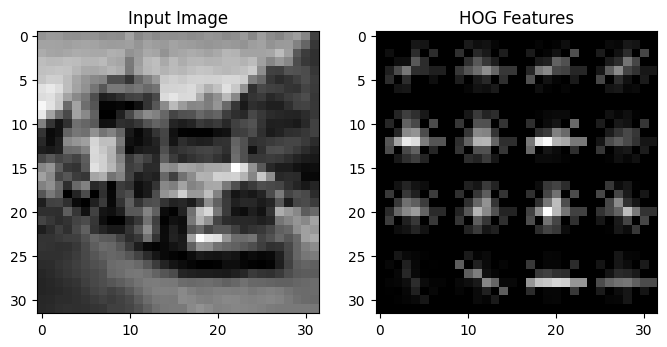

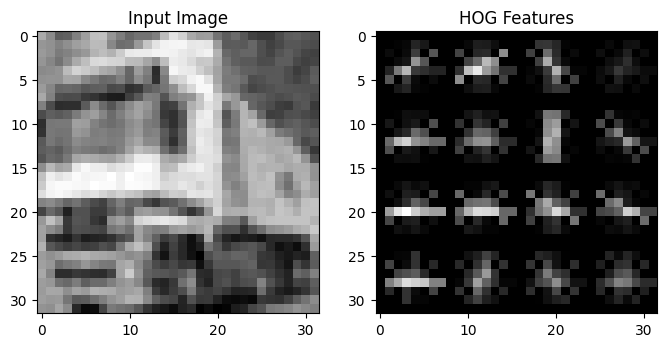

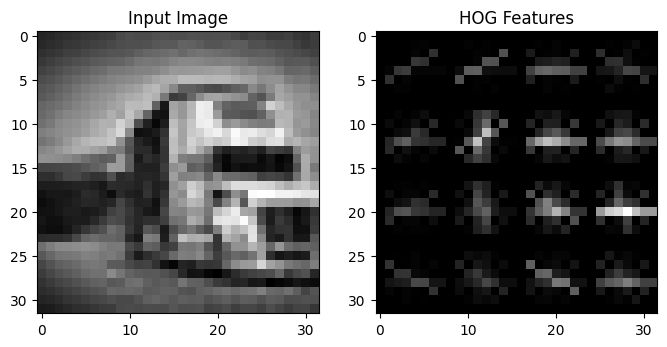

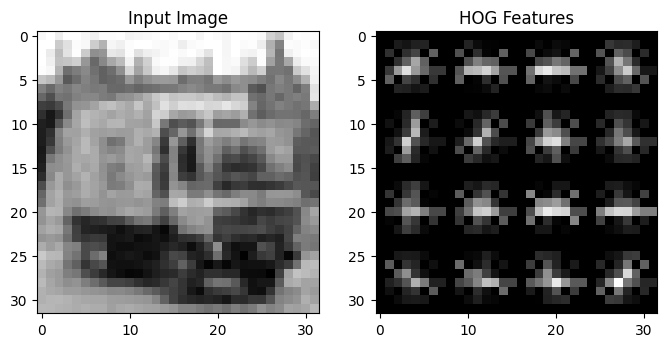

In [ ]:
# Compute HOG features for the datasets
train_fake_hog = compute_hog_features(train_fake_data)
train_real_hog = compute_hog_features(train_real_data)
test_fake_hog = compute_hog_features(test_fake_data)
test_real_hog = compute_hog_features(test_real_data)

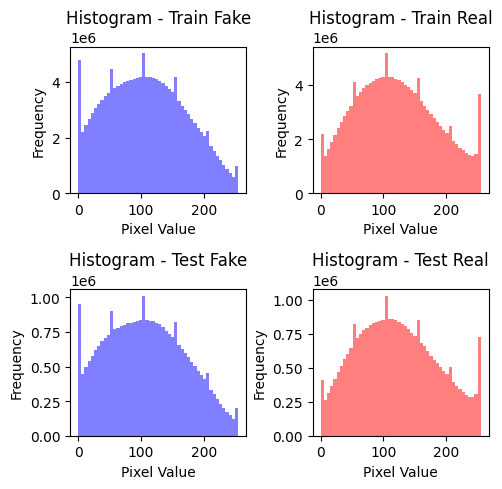

In [ ]:

# Create histograms for the pixel values of the datasets
plt.figure(figsize=(5, 5))

# Histogram for train_fake_data
plt.subplot(2, 2, 1)
plt.hist(train_fake_data.ravel(), bins=50, alpha=0.5, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Train Fake')

# Histogram for train_real_data
plt.subplot(2, 2, 2)
plt.hist(train_real_data.ravel(), bins=50, alpha=0.5, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Train Real')

# Histogram for test_fake_data
plt.subplot(2, 2, 3)
plt.hist(test_fake_data.ravel(), bins=50, alpha=0.5, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Test Fake')

# Histogram for test_real_data
plt.subplot(2, 2, 4)
plt.hist(test_real_data.ravel(), bins=50, alpha=0.5, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Test Real')

plt.tight_layout()
plt.show()



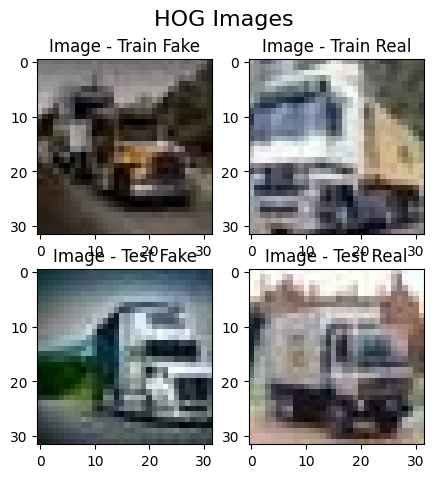

In [ ]:
# Display HOG images for the first image in each dataset
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle("HOG Images", fontsize=16)

# HOG for train_fake_data
axes[0, 0].imshow(train_fake_data[0], cmap=plt.cm.gray)
axes[0, 0].set_title('Image - Train Fake')

# HOG for train_real_data
axes[0, 1].imshow(train_real_data[0], cmap=plt.cm.gray)
axes[0, 1].set_title('Image - Train Real')

# HOG for test_fake_data
axes[1, 0].imshow(test_fake_data[0], cmap=plt.cm.gray)
axes[1, 0].set_title('Image - Test Fake')

# HOG for test_real_data
axes[1, 1].imshow(test_real_data[0], cmap=plt.cm.gray)
axes[1, 1].set_title('Image - Test Real')

plt.show()

<h2>GANS</h2>

Generative Adversarial Networks (GANs) are advanced AI models that play a crucial role in our mission to distinguish between genuine and AI-generated images. GANs consist of a generator and a discriminator, engaged in an adversarial training process. The generator creates synthetic data, striving to produce images that are indistinguishable from real ones, while the discriminator's task is to tell real from fake. This competitive training dynamic pushes GANs to generate increasingly convincing synthetic data. In our project, we utilize GANs to create AI-generated images and analyze their unique features, which provides critical insights for building models to discern between authentic and AI-generated visuals, addressing the challenges posed by image manipulation and verification in today's digital landscape.


<h1>Frequency Domain</h1>

Now after we get the results of HOGs, we can see another "dimension" of our data, we're going to show the differences of our classes in the frequency domain. 
The steps we're going to do is:
1) Calculate the frequency domain of every image with FFT. 
2) 

#### Splitting
   train: 80K images,
   val:   20k images,
   test:  20k images

In [ ]:


# Set paths
input_folder = "cifake-real-and-ai-generated-synthetic-images"
output_folder = "NEW-cifake-real-and-ai-generated-synthetic-images"

train_ratio = 0.8
validation_ratio = 0.2

# List classes
classes = ["FAKE", "REAL"]

# Create folders
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_folder, folder, "FAKE"), exist_ok=True)
    os.makedirs(os.path.join(output_folder, folder, "REAL"), exist_ok=True)

# Loop through classes and split
for class_name in classes:
    class_folder = os.path.join(input_folder, "train", class_name)
    files = os.listdir(class_folder)
    random.shuffle(files)

    train_count = int(train_ratio * len(files))
    val_count = int(validation_ratio * len(files))

    train_files = files[:train_count]
    val_files = files[train_count:train_count + val_count]
    test_files = files[train_count + val_count:]

    for file in train_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "train", class_name, file)
        shutil.copy(src, dest)

    for file in val_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "val", class_name, file)
        shutil.copy(src, dest)

    for file in test_files:
        src = os.path.join(class_folder, file)
        dest = os.path.join(output_folder, "test", class_name, file)
        shutil.copy(src, dest)


# preprocessing

### show some data

In [ ]:
# reading the XLSX file
fake_folder =('cifake-real-and-ai-generated-synthetic-images\\train\FAKE')

images_path = []
for filename in os.listdir(fake_folder):
  img = os.path.join(fake_folder,filename)
  if img is not None:
      images_path.append(img)


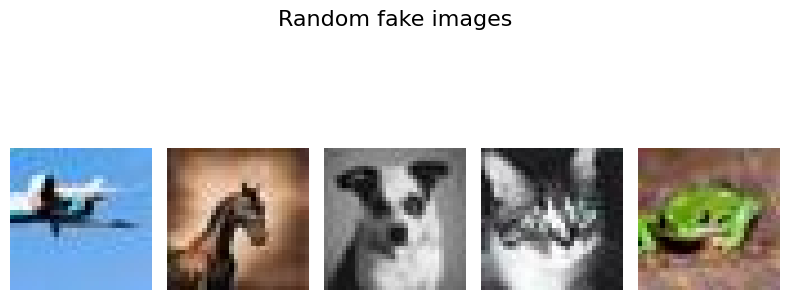

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

# Create a figure with 5 subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(8, 4))
fig.suptitle("Random fake images", fontsize=16)

# Loop to display 5 random FAKE images
for i in range(5):
    j = random.randint(0, 39999)
    image = cv2.imread(images_path[j])

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image in the corresponding subplot
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    else:
        print(f"Error loading image {images_path[j]}")

# Remove axis labels and ticks
for ax in axes:
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


# model


### starts build the CNN

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    brightness_range = (0.2, 1.4),
    rotation_range = 20,
    rescale = 1./255,
    zoom_range = [0.5, 1.5],
    channel_shift_range=150.0,
    horizontal_flip = True
)
training_set = train_datagen.flow_from_directory(
    'NEW-cifake-real-and-ai-generated-synthetic-images\\train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 80000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('NEW-cifake-real-and-ai-generated-synthetic-images\\val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
2500/2500 [==============================] - 399s 160ms/step - loss: 0.5988 - accuracy: 0.6761 - val_loss: 0.4244 - val_accuracy: 0.8132
Epoch 2/10
2500/2500 [==============================] - 392s 157ms/step - loss: 0.5555 - accuracy: 0.7152 - val_loss: 0.4075 - val_accuracy: 0.8202
Epoch 3/10
2500/2500 [==============================] - 333s 133ms/step - loss: 0.5286 - accuracy: 0.7357 - val_loss: 0.4154 - val_accuracy: 0.8027
Epoch 4/10
2500/2500 [==============================] - 330s 132ms/step - loss: 0.5058 - accuracy: 0.7514 - val_loss: 0.3234 - val_accuracy: 0.8622
Epoch 5/10
2500/2500 [==============================] - 328s 131ms/step - loss: 0.4908 - accuracy: 0.7604 - val_loss: 0.3140 - val_accuracy: 0.8664
Epoch 6/10
2500/2500 [==============================] - 344s 138ms/step - loss: 0.4767 - accuracy: 0.7710 - val_loss: 0.4084 - val_accuracy: 0.8000
Epoch 7/10
2500/2500 [==============================] - 360s 144ms/step - loss: 0.4697 - accuracy: 0.7760 - val_

In [ ]:
training_set.class_indices

{'FAKE': 0, 'REAL': 1}

In [ ]:
cnn.save('FAKE_REAL_IMG_cnn_model_V1.h5')

C:\Users\Yehiam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('FAKE_REAL_IMG_cnn_model_V1.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# predict 10 images in every clsass

In [ ]:
# reading the XLSX file
FAKE_TEST_folder =('cifake-real-and-ai-generated-synthetic-images\\test\FAKE')
REAL_TEST_folder =('cifake-real-and-ai-generated-synthetic-images\\test\REAL')

fake_test_images_path = []
real_test_images_path = []

for fakefilename in os.listdir(FAKE_TEST_folder):
  fake_img = os.path.join(FAKE_TEST_folder,fakefilename)
  if fake_img is not None:
      fake_test_images_path.append(fake_img)

for realfilename in os.listdir(REAL_TEST_folder):
  real_img = os.path.join(REAL_TEST_folder,realfilename)
  if real_img is not None:
      real_test_images_path.append(real_img)


1/1 [==============================] - 0s 37ms/step


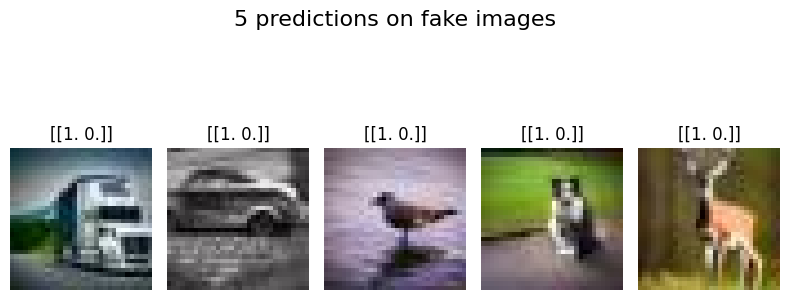

In [ ]:
# Create a figure with 5 subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(8, 4))
fig.suptitle("5 predictions on fake images", fontsize=16)

for i in range(5):
    image = cv2.imread(fake_test_images_path[i])
    test_image = tf.keras.utils.load_img(fake_test_images_path[i], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(result)
    else:
        print(f"Error loading image {images_path[i]}")

# Remove axis labels and ticks
for ax in axes:
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 49ms/step


C:\Users\Yehiam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 40ms/step


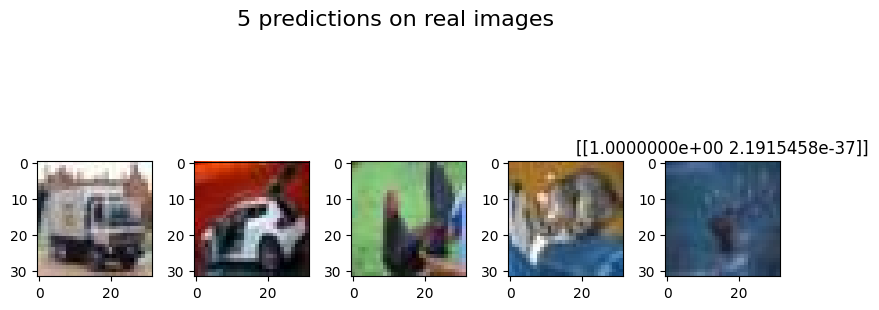

In [ ]:
# Create a figure with 5 subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(8, 4))
fig.suptitle("5 predictions on real images", fontsize=16)

for j in range(5):
    image = cv2.imread(real_test_images_path[j])
    test_image = tf.keras.utils.load_img(real_test_images_path[j], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        # Displaying the image
        axes[j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(result)
    else:
        print(f"Error loading image {images_path[j]}")

# Show the plot
plt.tight_layout()
plt.show()

<h1>(4) first analize</h1>

<h1>(5) future thoughts</h1>